### Pandas demo segunda parte

In [4]:
%pylab inline
import pandas as pd


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
elenco = pd.read_csv(r'C:\Users\luism\Documents\data\cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
e = elenco
len(e)

3564650

In [7]:
%%time
e[e.title == 'The Silence of the Lambs'].head()

CPU times: total: 312 ms
Wall time: 560 ms


,title,year,name,type,character,n
3936,The Silence of the Lambs,1991,Chuck Aber,actor,Agent Terry,21.0
78450,The Silence of the Lambs,1991,Lamont Arnold,actor,Flower Delivery Man,54.0
101250,The Silence of the Lambs,1991,Obba Babatund?,actor,TV Anchor Man,30.0
203810,The Silence of the Lambs,1991,Andre B. Blake,actor,Tall Memphis Cop,45.0
223263,The Silence of the Lambs,1991,Lawrence A. Bonney,actor,FBI Instructor,2.0


In [8]:
# Indexamos por el titulo
eti = e.set_index('title')

In [9]:
%%time
eti.loc["The Silence of the Lambs"].head()

CPU times: total: 969 ms
Wall time: 1.64 s


,year,name,type,character,n
title,,,,,
The Silence of the Lambs,1991,Chuck Aber,actor,Agent Terry,21.0
The Silence of the Lambs,1991,Lamont Arnold,actor,Flower Delivery Man,54.0
The Silence of the Lambs,1991,Obba Babatund?,actor,TV Anchor Man,30.0
The Silence of the Lambs,1991,Andre B. Blake,actor,Tall Memphis Cop,45.0
The Silence of the Lambs,1991,Lawrence A. Bonney,actor,FBI Instructor,2.0


In [10]:
# El indice realmente funciona cuando esa columna esta ordenada
eti = e.set_index('title').sort_index()
eti.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Gemma Massot,actress,Betty Goodman,7.0
#1 Serial Killer,2013,Romina Bovolini,actress,Lisa Simpson,14.0
#1 Serial Killer,2013,Kylee Cochran,actress,Jennifer Griffin,NaN
#1 Serial Killer,2013,Thomas McCurdy,actor,Golf Club Victim,23.0
#1 Serial Killer,2013,Tzi Ma,actor,Mr. Chang,3.0


In [11]:
%%time
eti.loc["The Silence of the Lambs"].head()

CPU times: total: 1.03 s
Wall time: 1.45 s


,year,name,type,character,n
title,,,,,
The Silence of the Lambs,1991,Jodie Foster,actress,Clarice Starling,1.0
The Silence of the Lambs,1991,Daniel von Bargen,actor,SWAT Communicator,48.0
The Silence of the Lambs,1991,Kasi Lemmons,actress,Ardelia Mapp,3.0
The Silence of the Lambs,1991,Cynthia Ettinger,actress,Officer Jacobs,40.0
The Silence of the Lambs,1991,Brent Hinkley,actor,Officer Murray,41.0


In [12]:
# El indice se puede generar de multiples columnas **Puede tardar en construirse**
eti = e.set_index(['title','year']).sort_index()
eti.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [13]:
%%time
# Se puede localizar por multiples columnas
b89 = eti.loc['Batman',1989].sort_index(ascending=False)

CPU times: total: 188 ms
Wall time: 289 ms


<timed exec>:2: PerformanceWarning: indexing past lexsort depth may impact performance.


In [14]:
# Nombre de nuestros indices
b89.index.names

FrozenList(['title', 'year'])

In [15]:
# Quitar indices, 
b89.reset_index('year')

,year,name,type,character,n
title,,,,,
Batman,1989,Del Baker,actor,Napier Hood,31.0
Batman,1989,Michael Balfour,actor,Scientist,44.0
Batman,1989,David Baxt,actor,Dr. Thomas Wayne,48.0
Batman,1989,Paul Birchard,actor,Another Reporter,55.0
Batman,1989,Hugo Blick,actor,Young Jack Napier,41.0
...,...,...,...,...,...
Batman,1989,Kit Hollerbach,actress,Becky,29.0
Batman,1989,Sharon Holm,actress,Mrs. Wayne,49.0
Batman,1989,Pam Rose,actress,Party Guest at Wayne Manor,NaN


In [16]:
# Groupby, agrupando por elementos
e = elenco
e = e[e.name == "Christian Bale"]
e.groupby(['title','year','character']).size()

title                       year  character                
3:10 to Yuma                2007  Dan Evans                    1
A Midsummer Night's Dream   1999  Demetrius                    1
All the Little Animals      1998  Bobby Platt                  1
American Hustle             2013  Irving Rosenfeld             1
American Psycho             2000  Patrick Bateman              1
Batman Begins               2005  Batman                       1
                                  Bruce Wayne                  1
Captain Corelli's Mandolin  2001  Mandras                      1
Empire of the Sun           1987  Jim                          1
Equilibrium                 2002  John Preston                 1
Exodus: Gods and Kings      2014  Moses                        1
Harsh Times                 2005  Jim Luther Davis             1
Hauru no ugoku shiro        2004  Howl                         1
Henry V                     1989  Robin the Luggage-Boy        1
Hostiles                    20

In [17]:
e = elenco
e = e[e.name == "Christian Bale"]
e.groupby(['title','year']).size()

title                       year
3:10 to Yuma                2007    1
A Midsummer Night's Dream   1999    1
All the Little Animals      1998    1
American Hustle             2013    1
American Psycho             2000    1
Batman Begins               2005    2
Captain Corelli's Mandolin  2001    1
Empire of the Sun           1987    1
Equilibrium                 2002    1
Exodus: Gods and Kings      2014    1
Harsh Times                 2005    1
Hauru no ugoku shiro        2004    1
Henry V                     1989    1
Hostiles                    2017    1
I'm Not There.              2007    2
Jin ling shi san chai       2011    1
Jungle Book                 2018    1
Knight of Cups              2015    1
Laurel Canyon               2002    1
Little Women                1994    1
Metroland                   1997    1
Mio min Mio                 1987    2
Newsies                     1992    1
Out of the Furnace          2013    1
Pocahontas                  1995    1
Prince of Jutland

<Axes: xlabel='year'>

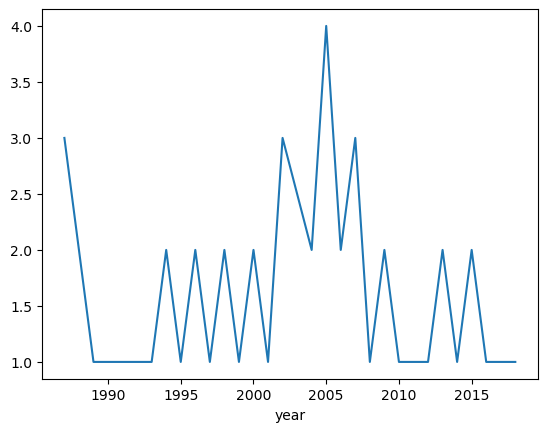

In [18]:
e = elenco
e = e[e.name == "Christian Bale"]
e.groupby(['year']).size().plot()

<Axes: xlabel='year'>

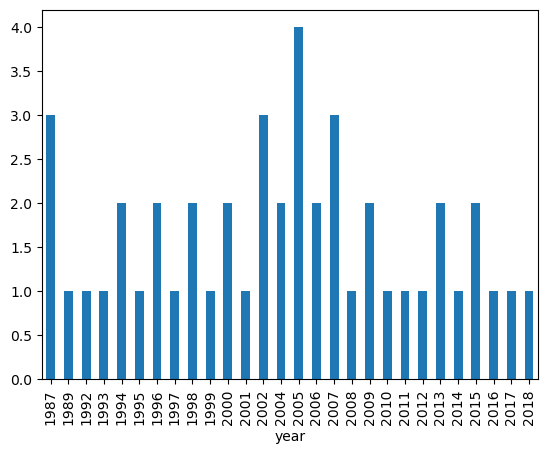

In [19]:
e = elenco
e = e[e.name == "Christian Bale"]
e.groupby(['year']).size().plot(kind='bar')

<Axes: xlabel='year'>

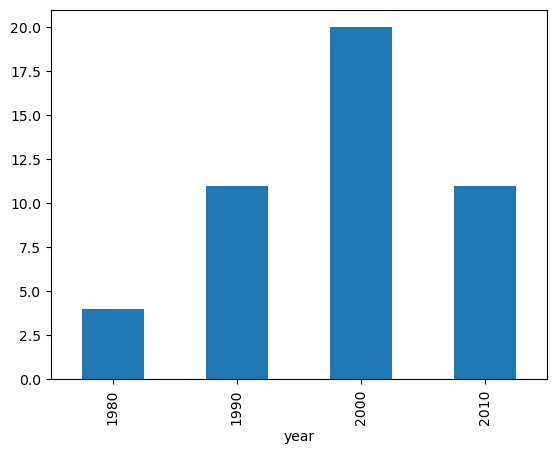

In [20]:
# Por decada
e = elenco
e = e[e.name == "Christian Bale"]
e.groupby(e.year // 10 * 10).size().plot(kind='bar')

In [21]:
# stack y unstack
e = elenco
e = e[(e.character == "D'Artagnan") | (e.character == 'Robin Hood')]
e.head()

,title,year,name,type,character,n
47507,The Three Musketeers,1939,Don Ameche,actor,D'Artagnan,1.0
129535,Robin Hood e i pirati,1960,Lex Barker,actor,Robin Hood,1.0
133752,Les trois mousquetaires: La vengeance de Milady,1961,G?rard Barray,actor,D'Artagnan,1.0
176174,Robin Hood,1991,Patrick Bergin,actor,Robin Hood,1.0
207693,Robin Hood: Ghosts of Sherwood,2012,Ben Bledsoe,actor,Robin Hood,NaN


In [22]:
e = e.groupby(['character', 'year'])
e.size()

character   year
D'Artagnan  1916    1
            1917    1
            1921    1
            1929    1
            1939    2
                   ..
Robin Hood  2002    1
            2006    1
            2012    3
            2013    1
            2017    1
Length: 62, dtype: int64

In [23]:
# Comparemos cada personaje en una columna
e.size().unstack(0).head()

character,D'Artagnan,Robin Hood
year,,
1913,NaN,2.0
1916,1.0,NaN
1917,1.0,NaN
1921,1.0,NaN
1929,1.0,1.0


In [24]:
e.size().unstack(1).head()

year,1913,1916,1917,1921,1929,1938,1939,1942,1948,1951,...,2001,2002,2005,2006,2010,2011,2012,2013,2015,2017
character,,,,,,,,,,,,,,,,,,,,,
D'Artagnan,NaN,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,...,1.0,1.0,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN
Robin Hood,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,3.0,1.0,NaN,1.0


In [25]:
e.size().unstack().head()

year,1913,1916,1917,1921,1929,1938,1939,1942,1948,1951,...,2001,2002,2005,2006,2010,2011,2012,2013,2015,2017
character,,,,,,,,,,,,,,,,,,,,,
D'Artagnan,NaN,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,...,1.0,1.0,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN
Robin Hood,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,3.0,1.0,NaN,1.0


In [26]:
e.size().unstack(0).fillna(0).head()

character,D'Artagnan,Robin Hood
year,,
1913,0.0,2.0
1916,1.0,0.0
1917,1.0,0.0
1921,1.0,0.0
1929,1.0,1.0


<Axes: xlabel='year'>

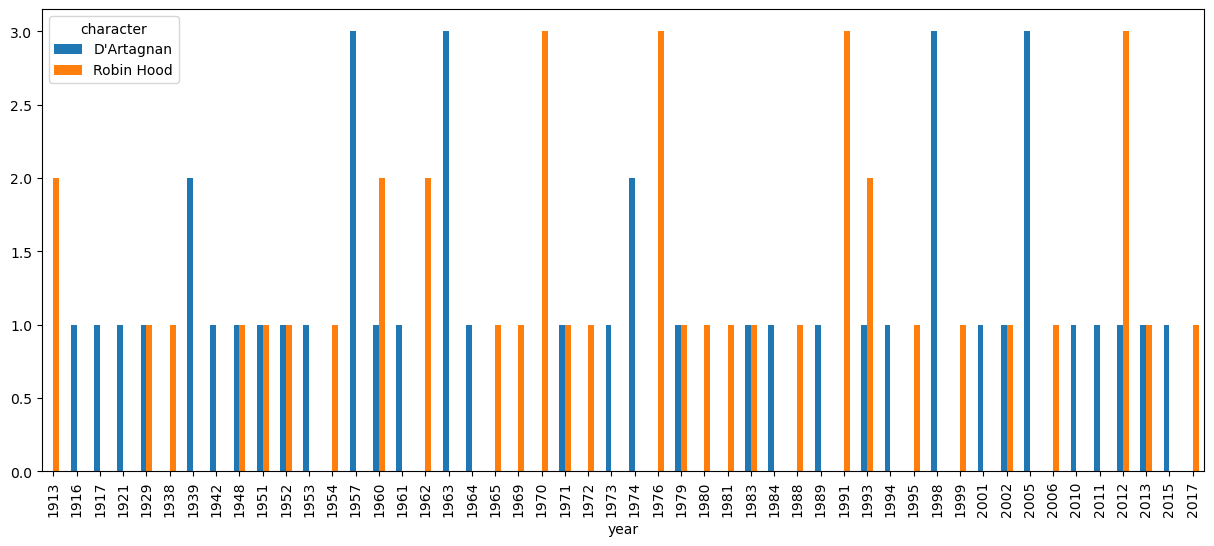

In [27]:
e.size().unstack(0).fillna(0).plot(kind='bar',figsize=(15,6))

<Axes: xlabel='year'>

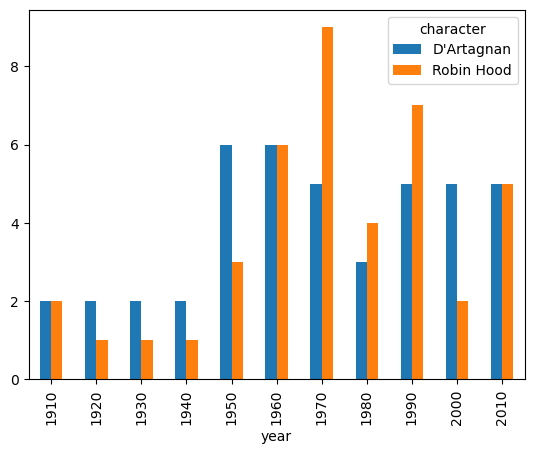

In [28]:
e = elenco

e = e[(e.character == "D'Artagnan") | (e.character == 'Robin Hood')]

e = e.groupby(['character', e.year // 10 * 10])
e.size().unstack(0).fillna(0).plot(kind='bar')
#e.size().unstack(0).plot(kind='bar')

In [29]:
e = elenco
e = e[(e.character == "D'Artagnan") | (e.character == 'Robin Hood')]

e = e.groupby(['character', e.year // 10 * 10])

e = e.size().unstack(0)
e

e = e.stack(0)
e
e = e.unstack(0)
e

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
character,,,,,,,,,,,
D'Artagnan,2,2,2,2,6,6,5,3,5,5,5
Robin Hood,2,1,1,1,3,6,9,4,7,2,5


<Axes: ylabel='year'>

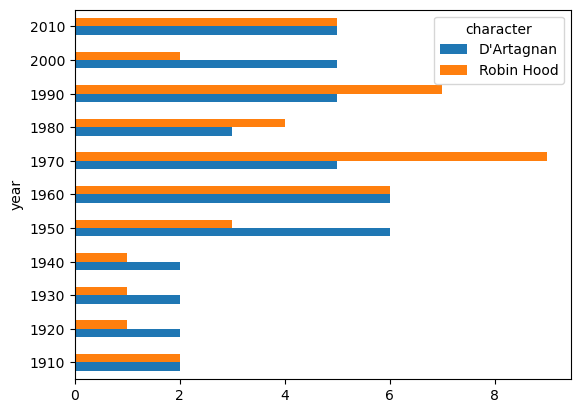

In [30]:
# stack y unstack

e = elenco
e = e[(e.character == "D'Artagnan") | (e.character == 'Robin Hood')]
e = e.groupby(['character',e.year //10 * 10]).size() 
e.unstack(0).fillna(0).plot(kind='barh')


In [31]:
# Graficar la diferencia entre el numero de papeles 
# para actores cada año y el numero de papeles para actrices
# cada año en la historia de la filmografia

<Axes: xlabel='year'>

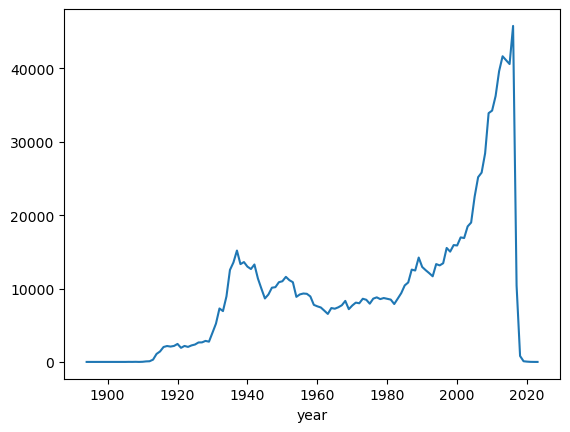

In [32]:
e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type').fillna(0)
(e.actor - e.actress).plot()

<Axes: xlabel='year'>

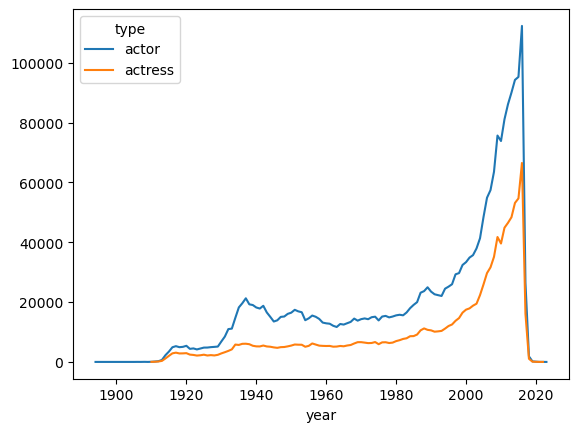

In [33]:
# Graficar en numero de papeles de actores cada año
# y el numero de papeles para actrices cada año

e = elenco
e = e.groupby(['year','type']).size()

e = e.unstack('type')

e.plot()

<Axes: xlabel='year'>

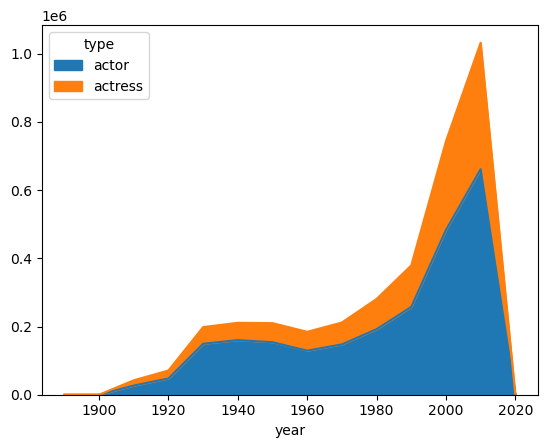

In [34]:
# El mismo grafico anterior pero categorizado por decada y
# con un grafico de area

e = elenco
e = e.groupby([e.year//10*10,'type']).size()
e = e.unstack('type')
e.plot(kind='area')

<Axes: xlabel='year'>

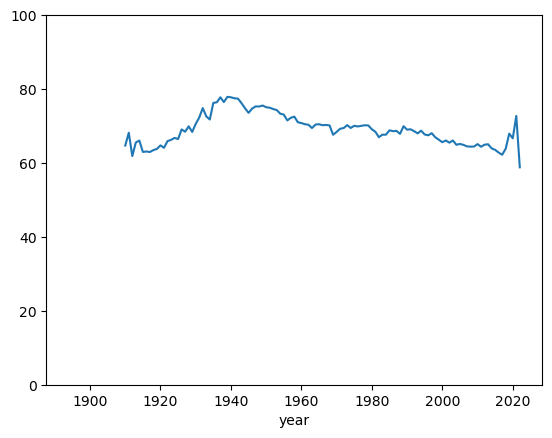

In [35]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia

e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type')
(e.actor / (e.actor+e.actress) * 100).plot(ylim=[0,100])

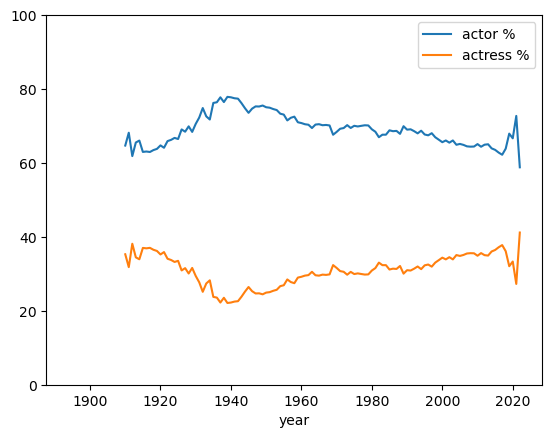

In [36]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
# junto al mismo porcentaje pero de actrices

e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type')


(e.actor / (e.actor+e.actress) * 100).plot(ylim=[0,100],label="actor %")
(e.actress / (e.actor+e.actress) * 100).plot(ylim=[0,100],label="actress %")
plt.legend()

<Axes: xlabel='year'>

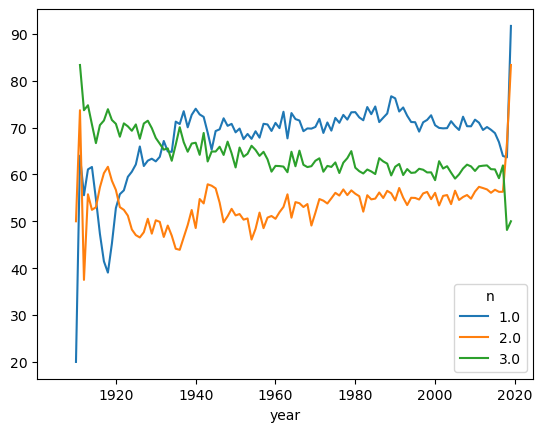

In [37]:
# Graficar 3 lines con clasificacion "n" de 1 al 3 donde cada 
# linea represente el porcentaje de la clasificacion para 
# los papeles de actores en cada año.

e = elenco
e = e[e.n <=3 ]

e = e.groupby(['year','type','n']).size()


e = e.unstack('type')   # Mover actor, actress a la dimension superior o de keys

p = e.actor / (e.actor+e.actress) * 100   # Reducimos
p = p.unstack('n')                        # Subimos la categoria 'n'
p.plot()

<Axes: title={'center': 'Peliculas con mas actrices en el reparto'}, xlabel='title'>

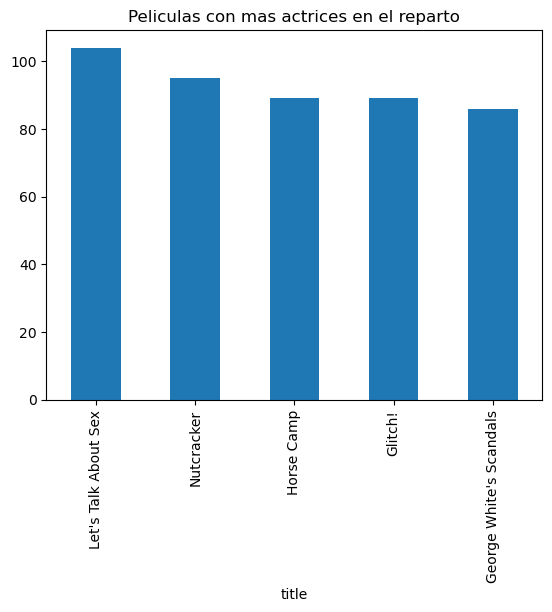

In [38]:
# Encontrar las 5 peliculas de la historia tengan mas
# actrices que actores

e = elenco
e = e.groupby(['type','title']).size()
e = e.unstack('type')
e = (e.actress - e.actor).sort_values(ascending=False)
e[:5].plot(kind='bar',title="Peliculas con mas actrices en el reparto")
